## 线性规划

In [2]:
import numpy as np
import pulp
from scipy.optimize import linprog
'''
min 2 * x1 + 3 * x2 + x3
s.t.
    x1 + 4 * x2 + 2 * x3 >= 8
    3 * x1 + 2 * x2 >= 6
    x1, x2, x3 >= 0
'''
c = np.array([2, 3, 1])
A = np.array([
    [-1, -4, -2],
    [-3, -2, 0]
])
b = np.array([-8, -6])
'''
linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=(0, None))
ub: upper bound constraints
eq: equality constraints
bounds: range of variables, (0, None) means >= 0
'''
results = linprog(c, A_ub=A, b_ub=b)
print(results)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 7.0
              x: [ 8.000e-01  1.800e+00  0.000e+00]
            nit: 3
          lower:  residual: [ 8.000e-01  1.800e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-5.000e-01 -5.000e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


In [3]:
# 例 1.1
from matplotlib import pyplot as plt
import pandas as pd
r = [0.05, 0.28, 0.21, 0.23, 0.25]
q = [0, 0.025, 0.015, 0.055, 0.026]
p = [0, 0.01, 0.02, 0.045, 0.065]
M = 1

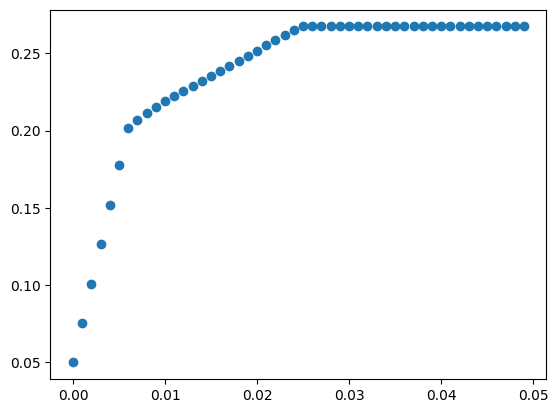

        a        x0        x1        x2        x3        x4    income
0   0.000  1.000000 -0.000000 -0.000000 -0.000000 -0.000000  0.050000
1   0.001  0.831638  0.040000  0.066667  0.018182  0.038462  0.075528
2   0.002  0.663277  0.080000  0.133333  0.036364  0.076923  0.101055
3   0.003  0.494915  0.120000  0.200000  0.054545  0.115385  0.126583
4   0.004  0.326554  0.160000  0.266667  0.072727  0.153846  0.152110
5   0.005  0.158192  0.200000  0.333333  0.090909  0.192308  0.177638
6   0.006  0.000000  0.240000  0.400000  0.109091  0.221221  0.201908
7   0.007  0.000000  0.280000  0.466667  0.127273  0.101596  0.206607
8   0.008  0.000000  0.320000  0.533333  0.127081  0.000000  0.211243
9   0.009  0.000000  0.360000  0.600000  0.023349  0.000000  0.215520
10  0.010  0.000000  0.400000  0.584314  0.000000  0.000000  0.219020
11  0.011  0.000000  0.440000  0.544706  0.000000  0.000000  0.222294
12  0.012  0.000000  0.480000  0.505098  0.000000  0.000000  0.225569
13  0.013  0.000000 

In [4]:
# 法一
c = np.array([i - j for i, j in zip(p, r)])
A_ub = np.diag(q)
A_eq = np.array([[i + 1 for i in p]])
b_eq = np.array([M])
a = 0
results = []
x0 = []
x1 = []
x2 = []
x3 = []
x4 = []
while a < 0.05:
    b_ub = np.array([[a], [a], [a], [a], [a]])
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq)
    results.append(result['fun'])
    x0.append(result['x'][0])
    x1.append(result['x'][1])
    x2.append(result['x'][2])
    x3.append(result['x'][3])
    x4.append(result['x'][4])
    a += 0.001
x = np.array([0.001 * i for i in range(0, 50)])
y = np.array([-i for i in results])
plt.plot(x, y, 'o')
plt.show()
data = {
    'a': [0.001 * i for i in range(0, 50)],
    'x0': x0,
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'income': [-i for i in results]
}
df = pd.DataFrame(data)
print(df)

## 整数规划

### 分支定界法

min 3 * x1 + 4 * x2 + x3

s.t.

    x1 + 6 * x2 + 2 * x3 >= 5
    2 * x1 >= 3
    x1, x2, x3 >= 0 且为整数

In [5]:
# 法一：scipy.optimize.linprog
import numpy as np
import math
import sys
from scipy.optimize import linprog

c = [3, 4, 1]
A_ub = [
    [-1, -6, -2],
    [-2, 0, 0],
]
b_ub = [-5, -3]
A_eq = [[0, 0, 0]]
b_eq = [0]


def integer_prog(c, A_ub, b_ub, A_eq, b_eq, e=1.0e-8):
    result = linprog(np.array(c), A_ub=np.array(A_ub), b_ub=np.array(b_ub), A_eq=np.array(A_eq), b_eq=np.array(b_eq))
    best_value = sys.maxsize
    best_x = result['x']
    if not (type(result['x']) is float or result['status'] != 0):
        best_value = sum([i * j for i, j in zip(c, best_x)])
    if all(((i - math.floor(i)) <= e or (math.ceil(i) - i) <= e) for i in best_x):
        return (best_value, best_x)
    else:
        index = [i for i, x in enumerate(best_x) if (x - math.floor(x) > e and (math.ceil(x) - x) > e)][0]
        new_constraints1 = [0] * len(c)
        new_constraints2 = [0] * len(c)
        new_constraints1[index] = -1
        new_constraints2[index] = 1
        new_A_ub1 = A_ub.copy()
        new_A_ub2 = A_ub.copy()
        new_A_ub1.append(new_constraints1)
        new_A_ub2.append(new_constraints2)
        new_b_ub1 = b_ub.copy()
        new_b_ub2 = b_ub.copy()
        new_b_ub1.append(-math.ceil(best_x[index]))
        new_b_ub2.append(math.floor(best_x[index]))
        result1 = integer_prog(c, new_A_ub1, new_b_ub1, A_eq, b_eq, e)
        result2 = integer_prog(c, new_A_ub1, new_b_ub1, A_eq, b_eq, e)
        return result1 if result1[0] < result2[0] else result2

print(integer_prog(c, A_ub, b_ub, A_eq, b_eq))

(np.float64(8.0), array([2., 0., 2.]))


In [6]:
# 法二：Pulp
import pulp as pp

c = [3, 4, 1]
# gq: greater or equal
A_gq = [
    [1, 6, 2],
    [2, 0, 0]
]
b_gq = [5, 3]
model = pp.LpProblem(sense=pp.LpMinimize)   # 确定求最大值还是最小值
x = [pp.LpVariable(f'x{i}', lowBound=0, cat='Integer') for i in [1, 2, 3]]  # 定义决策变量
model += pp.lpDot(c, x)  # 定义目标函数（lpDot是点积）
# 设置约束条件
for i in range(len(A_gq)):
    model += (pp.lpDot(A_gq[i], x) >= b_gq[i])
model.solve()  # 调用求解器
print(f'value: {pp.value(model.objective)}')
print(f'x: {[pp.value(i) for i in x]}')

value: 8.0
x: [2.0, 0.0, 2.0]


### 割平面法

In [7]:
import numpy as np
import math
from scipy.optimize import linprog

c = np.array([-20, -14, -16, -36, -32, -30, 0, 0, 0, 0])
A_eq = np.array([
    [0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.01, 0, 0, 0],
    [0.02, 0, 0, 0.05, 0, 0, 0, 0.01, 0, 0],
    [0, 0.02, 0, 0, 0.05, 0, 0, 0, 0.01, 0],
    [0, 0, 0.03, 0, 0, 0.08, 0, 0, 0, 0.01],
])
b_eq = np.array([850, 700, 100, 900])


def integer_cutting_plane(c, A_eq, b_eq, e=1.0e-8):
    while True:
        result = linprog(c, A_eq=A_eq, b_eq=b_eq)
        x = result['x']
        # 判断是否为整数
        if all(((i - math.floor(i)) <= e or (math.ceil(i) - i) <= e) for i in x):
            return x
        # 添加割平面
        new_constraint = (A_eq @ x <= b_eq)
        A_eq = np.vstack((A_eq, new_constraint))
        b_eq = np.append(b_eq, np.floor(A_eq @ x))

print(integer_cutting_plane(c, A_eq, b_eq))

[35000.  5000. 30000.     0.     0.     0. 15000.     0.     0.     0.]


### 匈牙利算法

In [8]:
# 投资问题
import pulp as pp
invest = pp.LpProblem("Invest_decision_problem", sense=pp.LpMaximize)     # 定义问题
# 定义决策变量
x1 = pp.LpVariable('A', cat='Binary')
x2 = pp.LpVariable('B', cat='Binary')
x3 = pp.LpVariable('C', cat='Binary')
x4 = pp.LpVariable('D', cat='Binary')
x5 = pp.LpVariable('E', cat='Binary')
invest += (150 * x1 + 210 * x2 + 60 * x3 + 80 * x4 + 180 * x5)      # 添加目标函数
# 添加约束条件
invest += (210 * x1 + 300 * x2 + 150 * x3 + 130 * x4 + 260 * x5 <= 600)
invest += (x1 + x2 + x3 == 1)
invest += (x3 + x4 == 1)
invest += (x5 - x1 <= 0)
invest.solve()

print(invest.name)
print(f'status: {pp.LpStatus[invest.status]}')
for i in invest.variables():
    print(f'{i.name} = {i.varValue}')
print(f'value = {pp.value(invest.objective)}')

Invest_decision_problem
status: Optimal
A = 1.0
B = 0.0
C = 0.0
D = 1.0
E = 1.0
value = 410.0


In [9]:
# 固定费用问题
import pulp as pp
fixed_cost = pp.LpProblem("fixed_cost_problem", sense=pp.LpMaximize)
x1 = pp.LpVariable('x1', lowBound=0, cat='Integer')
x2 = pp.LpVariable('x2', lowBound=0, cat='Integer')
x3 = pp.LpVariable('x3', lowBound=0, cat='Integer')
y1 = pp.LpVariable('y1', cat='Binary')
y2 = pp.LpVariable('y2', cat='Binary')
y3 = pp.LpVariable('y3', cat='Binary')
fixed_cost += (150 * x1 + 220 * x2 + 300 * x3 - 200000 * y1 - 150000 * y2 - 100000 * y3)
fixed_cost += (3 * x1 + 2 * x2 + 6 * x3 <= 8200)
fixed_cost += (0.8 * x1 + 1.1 * x2 + 1.5 * x3 <= 8800)
fixed_cost += (x1 - 2800 * y1 <= 0)
fixed_cost += (x2 - 4100 * y2 <= 0)
fixed_cost += (x3 - 1400 * y3 <= 0)
fixed_cost.solve()

print(fixed_cost.name)
if pp.LpStatus[fixed_cost.status] == 'Optimal':
    for i in fixed_cost.variables():
        print(f'{i.name} = {i.varValue}')
    print(f'value = {pp.value(fixed_cost.objective)}')

fixed_cost_problem
x1 = 0.0
x2 = 4100.0
x3 = 0.0
y1 = 0.0
y2 = 1.0
y3 = 0.0
value = 752000.0


In [10]:
# 指派问题
from scipy.optimize import linear_sum_assignment
import numpy as np

C = np.array([
    [2, 15, 13, 4],
    [10, 4, 14, 15],
    [9, 14, 16, 13],
    [7, 8, 11, 9]
])
row_ind, col_ind = linear_sum_assignment(C)
sum = 0
for i, j in zip(row_ind, col_ind):
    print(f'工人{i+1}被指派到项目{j+1}')
    sum += C[i, j]
print(f'总成本为{sum}')

工人1被指派到项目4
工人2被指派到项目2
工人3被指派到项目1
工人4被指派到项目3
总成本为28


## 非线性规划

In [11]:
from scipy.optimize import minimize
import numpy as np
'''
minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
fun: 目标函数   fun(x, *args)    x: 1-D array with shape (n,)
x0: 初始值     ndarray with shape (n,)
args: 目标函数参数
method: 优化方法
    - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
    - 'Powell'      :ref:`(see here) <optimize.minimize-powell>`
    - 'CG'          :ref:`(see here) <optimize.minimize-cg>`
    - 'BFGS'        :ref:`(see here) <optimize.minimize-bfgs>`
    - 'Newton-CG'   :ref:`(see here) <optimize.minimize-newtoncg>`
    - 'L-BFGS-B'    :ref:`(see here) <optimize.minimize-lbfgsb>`
    - 'TNC'         :ref:`(see here) <optimize.minimize-tnc>`
    - 'COBYLA'      :ref:`(see here) <optimize.minimize-cobyla>`
    - 'SLSQP'       :ref:`(see here) <optimize.minimize-slsqp>`
    - 'trust-constr':ref:`(see here) <optimize.minimize-trustconstr>`
    - 'dogleg'      :ref:`(see here) <optimize.minimize-dogleg>`
    - 'trust-ncg'   :ref:`(see here) <optimize.minimize-trustncg>`
    - 'trust-exact' :ref:`(see here) <optimize.minimize-trustexact>`
    - 'trust-krylov' :ref:`(see here) <optimize.minimize-trustkrylov>`
    - custom - a callable object, see below for description.

    If not given, chosen to be one of ``BFGS``, ``L-BFGS-B``, ``SLSQP``,
    depending on whether or not the problem has constraints or bounds.
jac: 目标函数的梯度
hess: 目标函数的海森矩阵
hessp: 目标函数的海森矩阵的海森矩阵
bounds: 变量的边界
constraints: 约束条件 dict or list of dicts
    {
    'type': str    "eq" for equation, "ineq" for inequality constrains (SLSQP 是 >=)
    'fun': function
    }
tol: 误差容忍度
callback: 回调函数
options: 优化选项
'''

'\nminimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)\nfun: 目标函数   fun(x, *args)    x: 1-D array with shape (n,)\nx0: 初始值     ndarray with shape (n,)\nargs: 目标函数参数\nmethod: 优化方法\n    - \'Nelder-Mead\' :ref:`(see here) <optimize.minimize-neldermead>`\n    - \'Powell\'      :ref:`(see here) <optimize.minimize-powell>`\n    - \'CG\'          :ref:`(see here) <optimize.minimize-cg>`\n    - \'BFGS\'        :ref:`(see here) <optimize.minimize-bfgs>`\n    - \'Newton-CG\'   :ref:`(see here) <optimize.minimize-newtoncg>`\n    - \'L-BFGS-B\'    :ref:`(see here) <optimize.minimize-lbfgsb>`\n    - \'TNC\'         :ref:`(see here) <optimize.minimize-tnc>`\n    - \'COBYLA\'      :ref:`(see here) <optimize.minimize-cobyla>`\n    - \'SLSQP\'       :ref:`(see here) <optimize.minimize-slsqp>`\n    - \'trust-constr\':ref:`(see here) <optimize.minimize-trustconstr>`\n    - \'dogleg\'      :ref:`(see here) <optimize.m

In [12]:
'''
min (2 + x1) / (1 + x2) - 3 * x1 + 4 * x3
s.t. 0.1 <= xi <= 0.9, i = 1, 2, 3
'''
def fun(x):
    x1, x2, x3 = x
    return (2 + x1) / (1 + x2) - 3 * x1 + 4 * x3


lb = [0.1] * 3
ub = [0.9] * 3
bounds = tuple(zip(lb, ub))
result = minimize(fun, np.ones(3), bounds=bounds)
print(result)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.7736842105263159
        x: [ 9.000e-01  9.000e-01  1.000e-01]
      nit: 1
      jac: [-2.474e+00 -8.033e-01  4.000e+00]
     nfev: 8
     njev: 2
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


In [13]:
'''
min x1 ** 2 + x2 ** 2 + x3 ** 2 + 8
s.t.
    x1 ** 2 - x2 + x3 ** 2 >= 0
    x1 + x2 ** 2 + x3 ** 2 <= 20
    -x1 - x2 ** 2 + 2 = 0
    x2 + 2 * x3 ** 2 = 3
    x1, x2, x3 >= 0
'''
H = np.diag([1, 1, 1])
fun = lambda x: x.T @ H @ x + 8
constrains = [
    {
        'type': 'ineq',
        'fun': lambda x: x[0] ** 2 - x[1] + x[2] ** 2,
    },
    {
        'type': 'ineq',
        'fun': lambda x: 20 - x[0] - x[1] ** 2 - x[2] ** 2,
    },
    {
        'type': 'eq',
        'fun': lambda x: -x[0] - x[1] ** 2 + 2,
    },
    {
        'type': 'eq',
        'fun': lambda x: x[1] + 2 * x[2] ** 2 - 3,
    }
]
bounds = [(0, None)] * 3
result = minimize(fun, np.ones(3), bounds=bounds, constraints=constrains)
print(result['fun'])
print(result['success'])
print(result['x'])

10.651091840594646
True
[0.55216734 1.20325918 0.94782404]


### 二次规划

In [14]:
'''
max x1 ** 2 + x2 ** 2 + 3 * x3 ** 2 + 4 * x4 ** 2 + 2 * x5 ** 2 - 8 * x1 - 2 * x2 - 3 * x3 - x4 - 2 * x5
s.t.
    x1 + x2 + x3 + x4 + x5 <= 400
    x1 + 2 * x2 + 2 * x3 + x4 + 6 * x5 <= 800
    2 * x1 + x2 + 6 * x3 <= 200
    x3 + x4 + 5 * x5 <= 200
    0 <= xi <= 99, i = 1, 2, 3, 4, 5
'''
from scipy.optimize import minimize
import numpy as np
c1 = np.array([1, 1, 3, 4, 2])
c2 = np.array([-8, -2, -3, -1, -2])
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 2, 2, 1, 6],
    [2, 1, 6, 0, 0],
    [0, 0, 1, 1, 5],
])
b = np.array([400, 800, 200, 200])
fun = lambda x: -c1 @ (x ** 2) - c2 @ x
constrains = {
    'type': 'ineq',
    'fun': lambda x: b - A @ x,
}
bounds = [(0, 99) for i in range(c1.shape[0])]
result = minimize(fun, np.ones(5), constraints=constrains, bounds=bounds)
print(result['fun'])    # 最优值（局部）   可通过改变初始值尝试
print(result['success'])    # 求解状态
print(result['x'])    # 最优解

-42677.568894812495
True
[0.00000000e+00 1.43988402e-12 3.33333334e+01 9.90000000e+01
 1.35333333e+01]


#### cvxopt 库

In [20]:
'''
min 1.5 * x1 ** 2 + x2 ** 2 + 0.85 * x3 ** 2 + 3 * x1 - 8.2 * x2 - 1.95 * x3
s.t.
    x1 + x3 <= 2
    -x1 + 2 * x2 <= 2
    x2 + 2 * x3 <= 3
    x1 + x2 + x3 = 3
'''
import numpy as np
from cvxopt import matrix, solvers
H = matrix([
    [3., 0, 0],     # 注意添加小数点，以保持数据类型一致
    [0, 2., 0],
    [0, 0, 1.7]
])
c = matrix([3., -8.2, -1.95])
A_ub = matrix([
    [1., 0, 1],
    [-1, 2, 0],
    [0, 1, 2],
])
b_ub = matrix([2., 2, 3])
A_eq = matrix(1., (1, 3))
b_eq = matrix(3.)
sol = solvers.qp(H, c, A_ub, b_ub, A_eq, b_eq)
print(sol['x'])    # 最优解
print(sol['primal objective'])    # 最优值

     pcost       dcost       gap    pres   dres
 0: -1.3148e+01 -4.4315e+00  1e+01  1e+00  9e-01
 1: -6.4674e+00 -7.5675e+00  1e+00  1e-16  2e-16
 2: -7.1538e+00 -7.1854e+00  3e-02  0e+00  7e-16
 3: -7.1758e+00 -7.1761e+00  3e-04  1e-16  1e-15
 4: -7.1760e+00 -7.1760e+00  3e-06  1e-16  7e-16
Optimal solution found.
[ 8.00e-01]
[ 1.40e+00]
[ 8.00e-01]

-7.175997768777275
